In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import re
from transformers import pipeline
import matplotlib.pyplot as plt


In [1]:

# Load the data
file_path = 'C:\\Users\\prasanna\\OneDrive\\Desktop\\amazon_reviews.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Uniq Id,Crawl Timestamp,Billing Uniq Id,Rating,Review Title,Review Rating,Review Date,User Id,Brand,Category,Sub Category,Product Description,Asin,Url,Review Content,Verified Purchase,Helpful Review Count,Manufacturer Response
0,10d8b81dc693db8a3f92e19254525d53,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Best Natural Deodorant!!,5.0,"March 6, 2020",AGIZFDSHLSBZ7KHQ4FV65W7B3HMQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2Q...,This is the one natural deodorant that works f...,Verified Purchase,0,NaN
1,31ef1ee4961d3fcff33e363edd7677eb,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Schmidt's Charcoal Deodorant is the best!,5.0,"March 6, 2020",AHOZPYWO6WE5MLAZZPDUAWNKKNRQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R14...,I am staying away from the conventional deodor...,Verified Purchase,0,NaN
2,6943e517922b051cbec496be32fbb57f,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Beware. Defective or counterfeit.,1.0,"March 6, 2020",AECC6GYWWLNCKSBG3DZDGFSYDOTA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2R...,Do not buy this from Amazon it's either defect...,Verified Purchase,One person found this helpful Helpful,NaN
3,6778c794e6ac7112981d4ebb239d6826,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Good for infrequent shavers in cooler months i...,3.0,"March 5, 2020",AEOO6OOEO4QD7Z4F6C2FMZUCW7PA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/RMI...,I started using this because I was getting cys...,NO,0,NaN
4,2335a28ae24db3b2191080bfd98a86e0,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,This isn’t the true product and will hurt your...,1.0,"March 2, 2020",AEHSDCGRIMVOUG6ST35FJ4FMMW5Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1R...,Dont buy this from amazon!!!! I never write re...,Verified Purchase,One person found this helpful Helpful,NaN


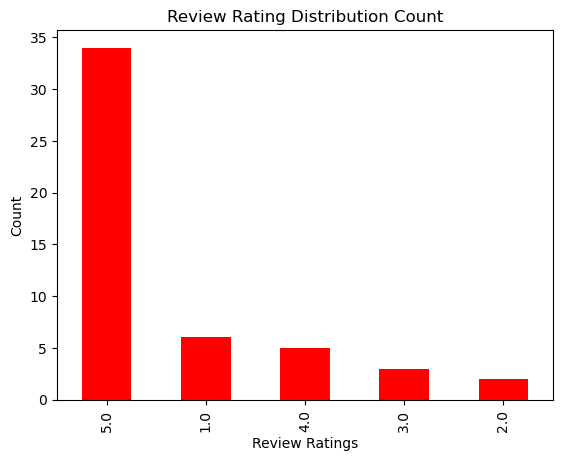

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each rating
rating_counts = df['Review Rating'].value_counts()

# Plot the bar chart
rating_counts.plot.bar(color='red')

# Customize the plot
plt.title('Review Rating Distribution Count')
plt.xlabel('Review Ratings')
plt.ylabel('Count')

# Show the plot
plt.show()


In [20]:
%pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------- 61.4/300.2 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 163.8/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


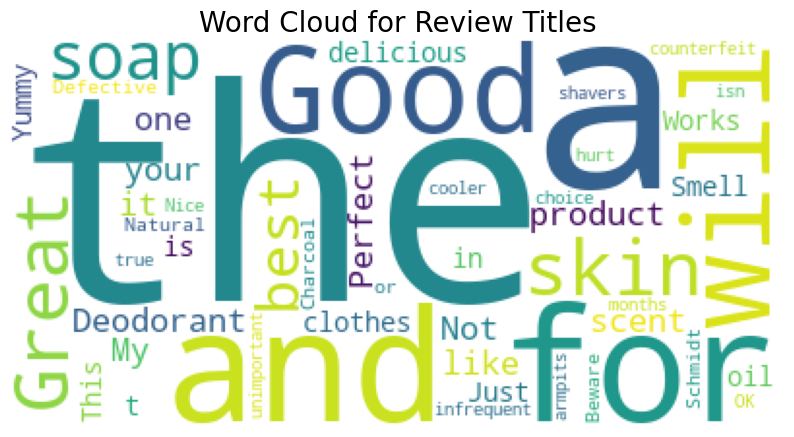

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Combine all review titles
titles = " ".join([title for title in df['Review Title']])

# Initialize word cloud object
wc = WordCloud(background_color='white', max_words=50, stopwords='english')

# Generate and plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(titles))
plt.title('Word Cloud for Review Titles', fontsize=20)
plt.axis('off')
plt.show()


In [6]:


# Load the data
file_path = 'C:\\Users\\prasanna\\OneDrive\\Desktop\\amazon_reviews.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Check the column names and the first few rows of the DataFrame
print(df.columns)
print(df.head())

# Use the correct column name for the review text
review_column = 'Review Content'  # Updated to the correct column name

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize objects for lemmatization and stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    words = text.split()
    # Remove stopwords, lemmatize and stem
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words if word not in stop_words]
    # Join the words back into one string
    return ' '.join(words)

# Apply preprocessing to the review column
df['cleaned_review'] = df[review_column].apply(preprocess_text)

# Display the first few rows of the dataframe
print(df[['Review Content', 'cleaned_review']].head())


Index(['Uniq Id', 'Crawl Timestamp', 'Billing Uniq Id', 'Rating',
       'Review Title', 'Review Rating', 'Review Date', 'User Id', 'Brand',
       'Category', 'Sub Category', 'Product Description', 'Asin', 'Url',
       'Review Content', 'Verified Purchase', 'Helpful Review Count',
       'Manufacturer Response'],
      dtype='object')
                            Uniq Id            Crawl Timestamp  \
0  10d8b81dc693db8a3f92e19254525d53  2020-03-17 02:32:10 +0000   
1  31ef1ee4961d3fcff33e363edd7677eb  2020-03-17 02:32:10 +0000   
2  6943e517922b051cbec496be32fbb57f  2020-03-17 02:32:10 +0000   
3  6778c794e6ac7112981d4ebb239d6826  2020-03-17 02:32:10 +0000   
4  2335a28ae24db3b2191080bfd98a86e0  2020-03-17 02:32:10 +0000   

                    Billing Uniq Id  Rating  \
0  c697dc43961526785292107b91a639e1     NaN   
1  c697dc43961526785292107b91a639e1     NaN   
2  c697dc43961526785292107b91a639e1     NaN   
3  c697dc43961526785292107b91a639e1     NaN   
4  c697dc43961526785292107b91

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prasanna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                      Review Content  \
0  This is the one natural deodorant that works f...   
1  I am staying away from the conventional deodor...   
2  Do not buy this from Amazon it's either defect...   
3  I started using this because I was getting cys...   
4  Dont buy this from amazon!!!! I never write re...   

                                      cleaned_review  
0  one natur deodor work bo smell throughout day ...  
1  stay away convent deodor lot fragranc combin a...  
2  buy amazon either defect counterfeit use buy p...  
3  start use get cyst aluminum antiperspir studi ...  
4  dont buy amazon never write review felt other ...  


In [7]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Apply sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Display the first few rows of the dataframe
df[['cleaned_review', 'sentiment']].head()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\prasanna\anaconda\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\prasanna\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


,cleaned_review,sentiment
0,one natur deodor work bo smell throughout day ...,NEGATIVE
1,stay away convent deodor lot fragranc combin a...,NEGATIVE
2,buy amazon either defect counterfeit use buy p...,POSITIVE
3,start use get cyst aluminum antiperspir studi ...,NEGATIVE
4,dont buy amazon never write review felt other ...,NEGATIVE


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


sentiment
POSITIVE    56.0
NEGATIVE    44.0
Name: proportion, dtype: float64


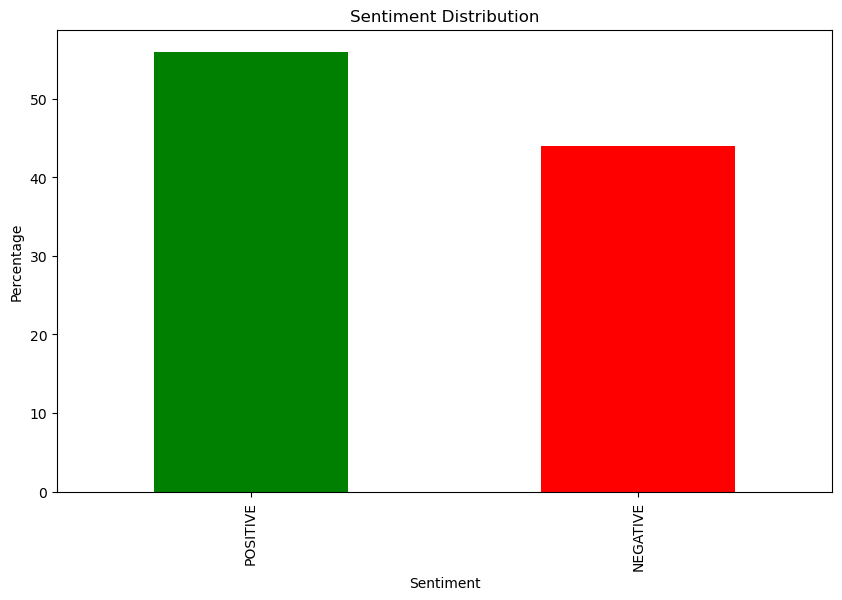

In [8]:

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Perform sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Calculate the percentages of each sentiment
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100

# Display the sentiment counts
print(sentiment_counts)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the splits
len(X_train), len(X_test)


(40, 10)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with a TF-IDF vectorizer and a logistic regression classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
accuracy


0.7